In [25]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages

In [40]:
class State(TypedDict):
    # Messages have the type "list". The 'add_messages" function
    # in the annotation defines how this state key should be update
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages : Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [41]:
import os
from langchain.chat_models import init_chat_model

gemini_model = 'google_genai:gemini-2.0-flash'
llm = init_chat_model(
    model = gemini_model
)

In [42]:
def chatbot(state:State):
    return {'messages': [llm.invoke(state['messages'])]}

# The first argument is the unique node name 
# The second argument is the funciton or object that will be called whenever
# the node is used

graph_builder.add_node('chatbot', chatbot)

In [43]:
graph_builder.add_edge(START, "chatbot")

In [44]:
graph = graph_builder.compile()

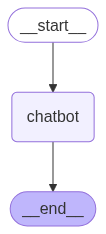

In [45]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # this requires some extra dependencies and is optional
    pass


In [47]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: I am a large language model, trained by Google.
Assistant: I am a large language model, trained by Google. I was trained on a massive dataset of text and code. My training was completed in **2022**.
Assistant: Okay, let's delve into the multifaceted world of Google! Here's a breakdown of what Google is, its history, its products, its impact, and some of the controversies surrounding it.

**What is Google?**

At its core, Google is a multinational technology company that focuses on:

*   **Search:**  It's most famous for its search engine, Google Search, which is the most widely used web-based search engine in the world.
*   **Online Advertising:**  Google makes the vast majority of its revenue through advertising, primarily through its Google Ads platform.
*   **Cloud Computing:** Google Cloud Platform (GCP) provides a suite of cloud computing services, competing with Amazon Web Services (AWS) and Microsoft Azure.
*   **Software:** Google develops and provides a wide range o